In [1]:
from typing import List
import pandas as pd
from scipy import optimize
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import itertools

# Time Series Forecasting
## Step 0
Load the given csv file in your language/environment.

In [2]:
data_frame = pd.read_csv('ts_data.csv')

Explore the data and its structure.

In [3]:
data_frame

,shop_id,time,transactions
0,145,311,132
1,145,312,107
2,145,313,52
3,145,314,73
4,145,315,53
...,...,...,...
995,1750,406,137
996,1750,407,145
997,1750,408,146
998,1750,409,136


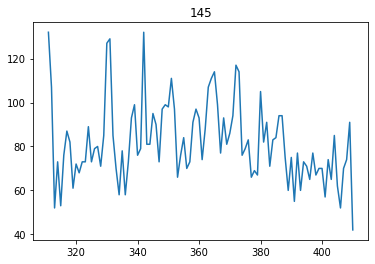

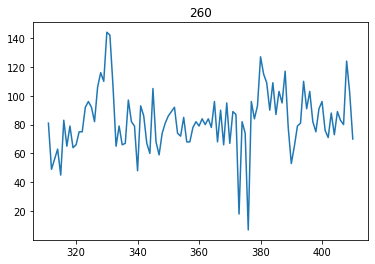

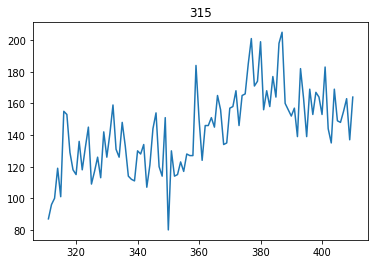

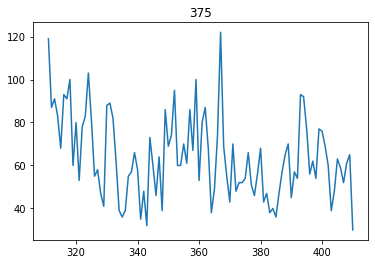

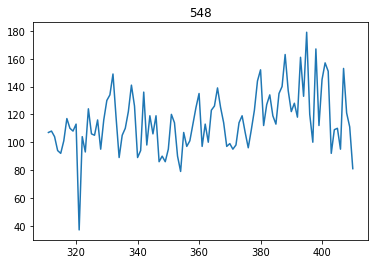

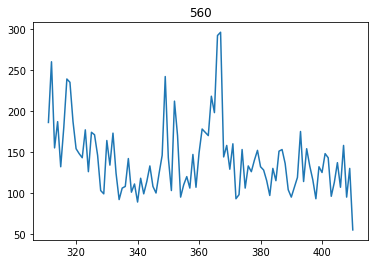

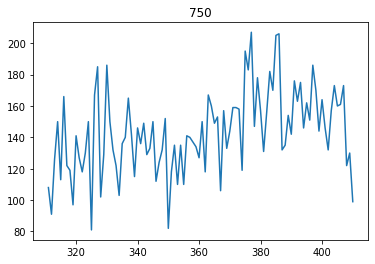

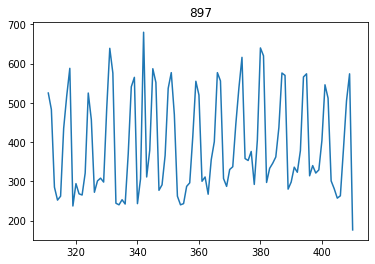

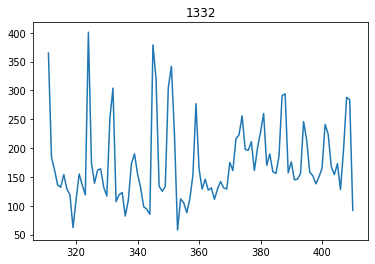

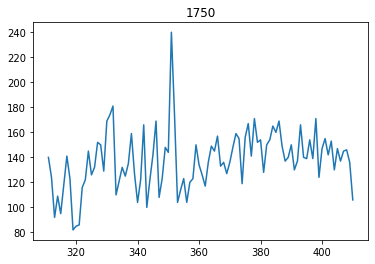

In [4]:
for name, group in data_frame.groupby('shop_id'):
    plt.plot(group['time'], group['transactions'])
    plt.title(name)
    plt.show()

## Step 1
Implement the AR and MA parts of the ARMA model*.

AR: $c + \sum_{i=1}^{p}\phi_i \cdot x_{i-t}$

MA: $\sum_{i=1}^{q}\theta_i \cdot \varepsilon_{t-i}$

In [5]:
def calculate_forecast(time_series: pd.DataFrame, p: int, q: int, optimize: bool, *args: List[np.float64]):
    args = args[0]
    c = args[0]
    phi = args[1:p+1]
    theta = args[p+1:]
    times = time_series['transactions'].tolist()
    forecast = []
    for t, transactions in enumerate(times):
        ar = sum(phi[i] * times[t-(i+1)] for i in range(min(t, p))) + c
        ma = sum(theta[i] * (times[t-(i+1)] - forecast[t-(i+1)]) for i in range(min(t, q)))
        forecast.append(ar + ma)
    if optimize:
        return mean_squared_error(times, forecast)
    else:
        return forecast

## Step 2
Use a general purpose optimizer (Nelder-Mead)to fit the model parameters to a given time series.


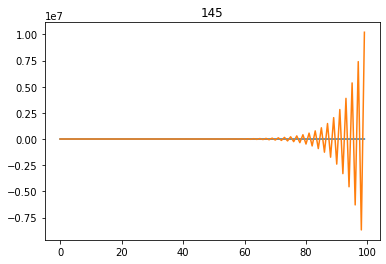

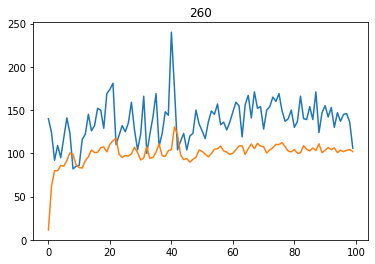

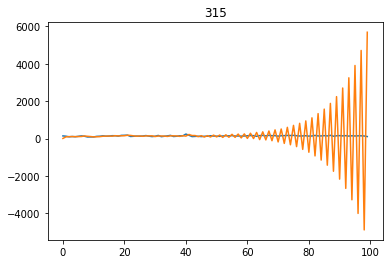

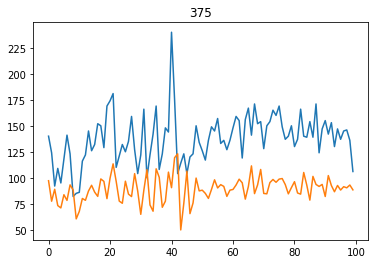

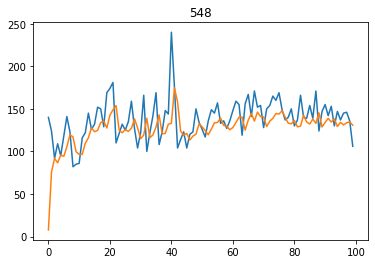

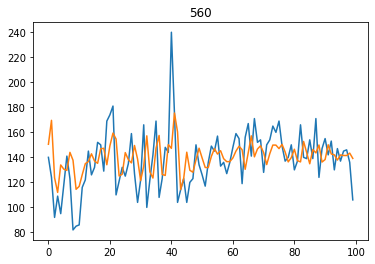

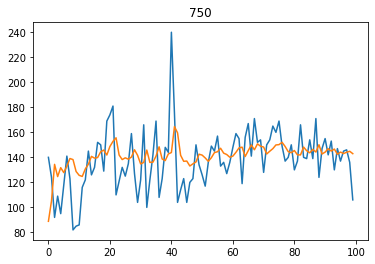

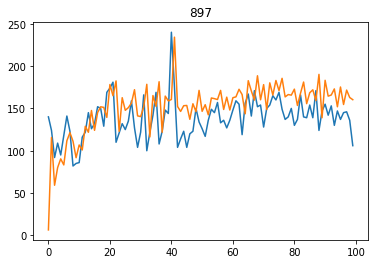

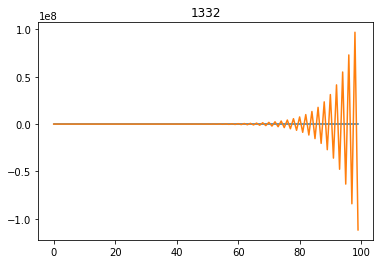

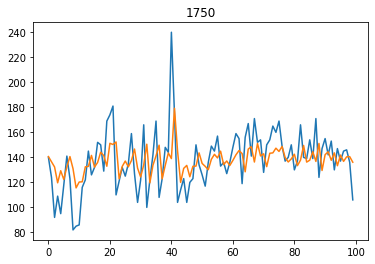

In [6]:
def optimize_forecast(time_series: pd.DataFrame, p: int, q: int):
    result = optimize.minimize(lambda x: calculate_forecast(time_series,p,q,True, x),
                               np.full(shape=1+p+q, fill_value=1.5), method='Nelder-Mead',
                              options={'maxiter':10000})
    forecast = calculate_forecast(group, p, q, False, result.x)
    return result, forecast

for name, time_series in data_frame.groupby('shop_id'):
    _, forecast = optimize_forecast(time_series, 2, 2)
    plt.plot(range(100), group['transactions'])
    plt.plot(range(100), forecast)
    plt.title(name)
    plt.show()

## Step 3
Search for the optimal combination of AR (p) and MA (q) components of the model for each given time series*.

Perform a grid search* for $p \in [0,3]$ and $q \in [0,3]$.

Report the forecast error.

In [7]:
results = dict()


for p, q in itertools.product(range(0,4), range(0,4)):
    for name, time_series in data_frame.groupby('shop_id'):
        print(f'{name}; p={p}; q={q}')
        result, forecast = optimize_forecast(time_series, p, q)
        error = mean_squared_error(time_series['transactions'].tolist(), forecast)
        if name not in results:
            results[name] = []
        results[name].append((p, q, error, result.x))

for name, result_list in results.items():
    min_tuple = min(result_list, key=lambda x: x[2])
    print(f'Shop {name}: p={min_tuple[0]}, q={min_tuple[1]}, MSE={min_tuple[2]}')

145; p=0; q=0
260; p=0; q=0
315; p=0; q=0
375; p=0; q=0
548; p=0; q=0
560; p=0; q=0
750; p=0; q=0
897; p=0; q=0
1332; p=0; q=0
1750; p=0; q=0
145; p=0; q=1
260; p=0; q=1
315; p=0; q=1
375; p=0; q=1
548; p=0; q=1
560; p=0; q=1
750; p=0; q=1
897; p=0; q=1
1332; p=0; q=1
1750; p=0; q=1
145; p=0; q=2
260; p=0; q=2
315; p=0; q=2
375; p=0; q=2
548; p=0; q=2
560; p=0; q=2
750; p=0; q=2
897; p=0; q=2
1332; p=0; q=2
1750; p=0; q=2
145; p=0; q=3
260; p=0; q=3
315; p=0; q=3
375; p=0; q=3
548; p=0; q=3
560; p=0; q=3
750; p=0; q=3
897; p=0; q=3
1332; p=0; q=3
1750; p=0; q=3
145; p=1; q=0
260; p=1; q=0
315; p=1; q=0
375; p=1; q=0
548; p=1; q=0
560; p=1; q=0
750; p=1; q=0
897; p=1; q=0
1332; p=1; q=0
1750; p=1; q=0
145; p=1; q=1
260; p=1; q=1
315; p=1; q=1
375; p=1; q=1
548; p=1; q=1
560; p=1; q=1
750; p=1; q=1
897; p=1; q=1
1332; p=1; q=1
1750; p=1; q=1
145; p=1; q=2
260; p=1; q=2
315; p=1; q=2
375; p=1; q=2
548; p=1; q=2
560; p=1; q=2
750; p=1; q=2
897; p=1; q=2
1332; p=1; q=2
1750; p=1; q=2
145; p